In [1]:
# Required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Sk-learn libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation libraries
from sklearn.metrics import (precision_score, recall_score, f1_score, classification_report, accuracy_score)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Arooba
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [2]:
path_to_dataset = r"F:\LJPE-Dataset\LJPE Dataset2.0.csv"
df = pd.read_csv(path_to_dataset)

In [3]:
train_set = df.query(" split=='train' ")
test_set = df.query(" split=='test' ")
validation_set = df.query(" split=='val' ")

In [4]:
X_train, X_test, Y_train, Y_test = train_set['case_description'], test_set['case_description'], train_set['encoded_judgment'], test_set['encoded_judgment']

In [5]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (9306,)
Shape of X_test (1023,)
Shape of Y_train (9306,)
Shape of Y_test (1023,)


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

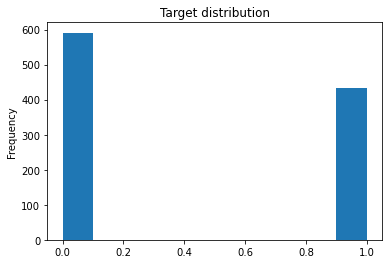

In [6]:
Y_test.plot(kind='hist', title='Target distribution')

### Vectorization

In [7]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features = max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features = max_feature_num, vocabulary = vectorizer.vocabulary_).fit_transform(X_test)

In [8]:
# check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((9306, 50000), (1023, 50000))

#### Plot Confusion Matrix

In [9]:
x_axes = ['Allowed', 'Dismissed']
y_axes =  ['Dismissed', 'Allowed']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

### Support Vector Machine

In [53]:
clf = svm.SVC(kernel='rbf', max_iter = 300) # Linear Kernel

#Train the model using the training sets
clf.fit(train_vecs, Y_train)

# testing
y_predsvm = clf.predict(test_vecs)

In [ ]:
train_accuracy = clf.score(train_vecs, Y_train)
print("Training accuracy:", train_accuracy)

In [ ]:
print("Test accuracy:", metrics.accuracy_score(Y_test, y_predsvm))

In [ ]:
print("F1 score: " + str(f1_score(Y_test, y_predsvm, average = "macro")))
print("Precision score: " +str(precision_score(Y_test, y_predsvm, average = "macro")))
print("Recall score: " +str(recall_score(Y_test, y_predsvm, average = "macro")))  

In [ ]:
conf_matrix(metrics.confusion_matrix(Y_test, y_predsvm))

### Logistic Regression

In [15]:
LR = LogisticRegression()

#Train the model using the training sets
LR.fit(train_vecs, Y_train)

# testing
y_predLR = LR.predict(test_vecs)

In [16]:
train_accuracy = LR.score(train_vecs, Y_train)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.7519879647539222


In [17]:
print("Testing accuracy:",metrics.accuracy_score(Y_test, y_predLR))

Testing accuracy: 0.6617790811339198


In [18]:
print("F1 score: " + str(f1_score(Y_test, y_predLR, average = "macro")))
print("Precision score: " +str(precision_score(Y_test, y_predLR, average = "macro")))
print("Recall score: " +str(recall_score(Y_test, y_predLR, average = "macro"))) 

F1 score: 0.6216942413748877
Precision score: 0.6633986928104575
Recall score: 0.6263160368490317


In [19]:
conf_matrix(metrics.confusion_matrix(Y_test, y_predLR))

### Random Forest

In [42]:
RF = RandomForestClassifier(n_estimators = 450, max_depth = 29, random_state = 43)

#Train the model using the training sets
RF.fit(train_vecs, Y_train)

# testing
y_predRF = RF.predict(test_vecs)

In [43]:
train_accuracy = RF.score(train_vecs, Y_train)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.9964539007092199


In [44]:
print("Testing accuracy:",metrics.accuracy_score(Y_test, y_predRF))

Testing accuracy: 0.6344086021505376


In [45]:
print("F1 score: " + str(f1_score(Y_test, y_predRF, average = "macro")))
print("Precision score: " +str(precision_score(Y_test, y_predRF, average = "macro")))
print("Recall score: " +str(recall_score(Y_test, y_predRF, average = "macro"))) 

F1 score: 0.5226449275362318
Precision score: 0.7095637810140237
Recall score: 0.5730459202857681


In [46]:
conf_matrix(metrics.confusion_matrix(Y_test, y_predRF))

### Naive Bayes

In [25]:
nb = MultinomialNB()

# Train the model
nb.fit(train_vecs, Y_train)

MultinomialNB()

In [26]:
# Make class anf probability predictions
y_pred_class = nb.predict(test_vecs)
y_pred_prob = nb.predict_proba(test_vecs)[:, 1]

In [27]:
train_accuracy = nb.score(train_vecs, Y_train)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.5840318074360628


In [28]:
print('Test accuracy:', metrics.accuracy_score(Y_test, y_pred_class))

Test accuracy: 0.581622678396872


In [29]:
print("F1 score: " + str(f1_score(Y_test, y_pred_class, average = "macro")))
print("Precision score: " +str(precision_score(Y_test, y_pred_class, average = "macro")))
print("Recall score: " +str(recall_score(Y_test, y_pred_class, average = "macro"))) 

F1 score: 0.37833094799972744
Precision score: 0.7067354965585054
Recall score: 0.5049410133483738


In [30]:
conf_matrix(metrics.confusion_matrix(Y_test, y_pred_class))

### Decision Trees

In [47]:
#criterion = entropy or gini

clf_model = DecisionTreeClassifier(criterion = "entropy", random_state = 42, 
                                   max_depth = 23, 
                                   min_samples_leaf = 11)

# testing
clf_model.fit(train_vecs, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=11,
                       random_state=42)

In [48]:
y_predDT = clf_model.predict(test_vecs)

In [49]:
train_accuracy = clf_model.score(train_vecs, Y_train)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8246292714377821


In [50]:
print("Testing accuracy:",metrics.accuracy_score(Y_test, y_predDT))

Testing accuracy: 0.5894428152492669


In [51]:
print("F1 score: " + str(f1_score(Y_test, y_predDT, average = "macro")))
print("Precision score: " +str(precision_score(Y_test, y_predDT, average = "macro")))
print("Recall score: " +str(recall_score(Y_test, y_predDT, average = "macro"))) 

F1 score: 0.5814923907707412
Precision score: 0.5812739965095985
Recall score: 0.5820819232938522


In [52]:
conf_matrix(metrics.confusion_matrix(Y_test, y_predDT))